# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [33]:
import numpy as np
import pandas as pd
from sys import exit
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [34]:
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [35]:
penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'sex', 'species', 'island'])
cols_species_island = pd.get_dummies(penguins[['species', 'island']])
cols_sex = pd.get_dummies(penguins['sex'], drop_first=True)
df = penguins.drop(['species', 'island', 'sex'], axis=1)
df = pd.concat([df, cols_species_island, cols_sex], axis=1)
print(df)

y = df['bill_depth_mm']
X = df.drop('bill_depth_mm', axis=1)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  \
0              39.1           18.7              181.0       3750.0  2007   
1              39.5           17.4              186.0       3800.0  2007   
2              40.3           18.0              195.0       3250.0  2007   
4              36.7           19.3              193.0       3450.0  2007   
5              39.3           20.6              190.0       3650.0  2007   
..              ...            ...                ...          ...   ...   
339            55.8           19.8              207.0       4000.0  2009   
340            43.5           18.1              202.0       3400.0  2009   
341            49.6           18.2              193.0       3775.0  2009   
342            50.8           19.0              210.0       4100.0  2009   
343            50.2           18.7              198.0       3775.0  2009   

     species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0             

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

MSE : Testing Data
3.4848247744766105
MSE : Testing Data
2.203002131235243
MSE : Testing Data
0.696039120112931
MSE : Testing Data
0.6248452016752394


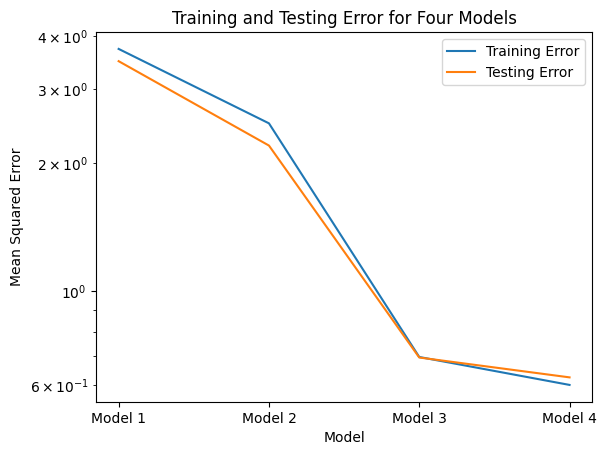

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

models = [
    ['bill_length_mm'],
    ['bill_length_mm', 'flipper_length_mm', 'body_mass_g'],
    ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap', 'species_Gentoo'],
    X_train.columns.tolist()
]

training_errors = []
testing_errors = []

for vars in models:
    lr = LinearRegression()
    lr.fit(X_train[vars], y_train)
    training_errors.append(mean_squared_error(y_train, lr.predict(X_train[vars])))
    testing_errors.append(mean_squared_error(y_test, lr.predict(X_test[vars])))
    print("MSE : Testing Data")
    print(mean_squared_error(y_test, lr.predict(X_test[vars])))

plt.figure()
plt.plot(range(1, len(models) + 1), training_errors, label='Training Error')
plt.plot(range(1, len(models) + 1), testing_errors, label='Testing Error')
plt.xticks(ticks=range(1, len(models) + 1), labels=[f'Model {i}' for i in range(1, len(models) + 1)])
plt.legend()
plt.title('Training and Testing Error for Four Models')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.yscale('log')
plt.show()


In this case of different models, model 4 will be best because of the lowest MSE (0.6248452016752394) for the testing data and based on the graph also the model 4 will be best. also the model 4 consist of all the dependent variables.
